In [1]:
import pm4py
import pandas
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Curso A1+A2 unificado
event_log_1 = pandas.read_csv('Data/A1-presencial-log.csv')
event_log_2 = pandas.read_csv('Data/A2-presencial-log.csv')
event_log = pandas.concat([event_log_1, event_log_2])

event_log_filtered = event_log[~event_log['NombreEvento'].str.contains(r'C?R+')]
event_log_filtered = pm4py.format_dataframe(event_log_filtered, case_id='Idusuario', activity_key='NombreEvento', timestamp_key='Hora')

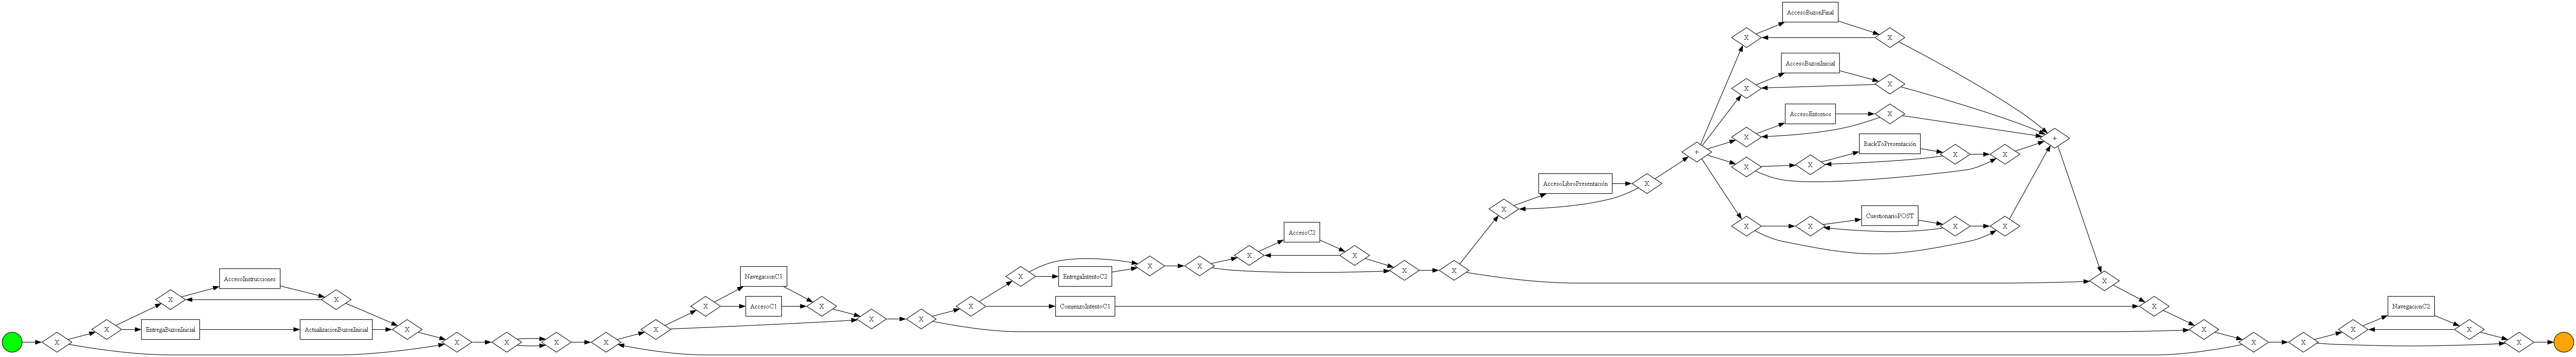

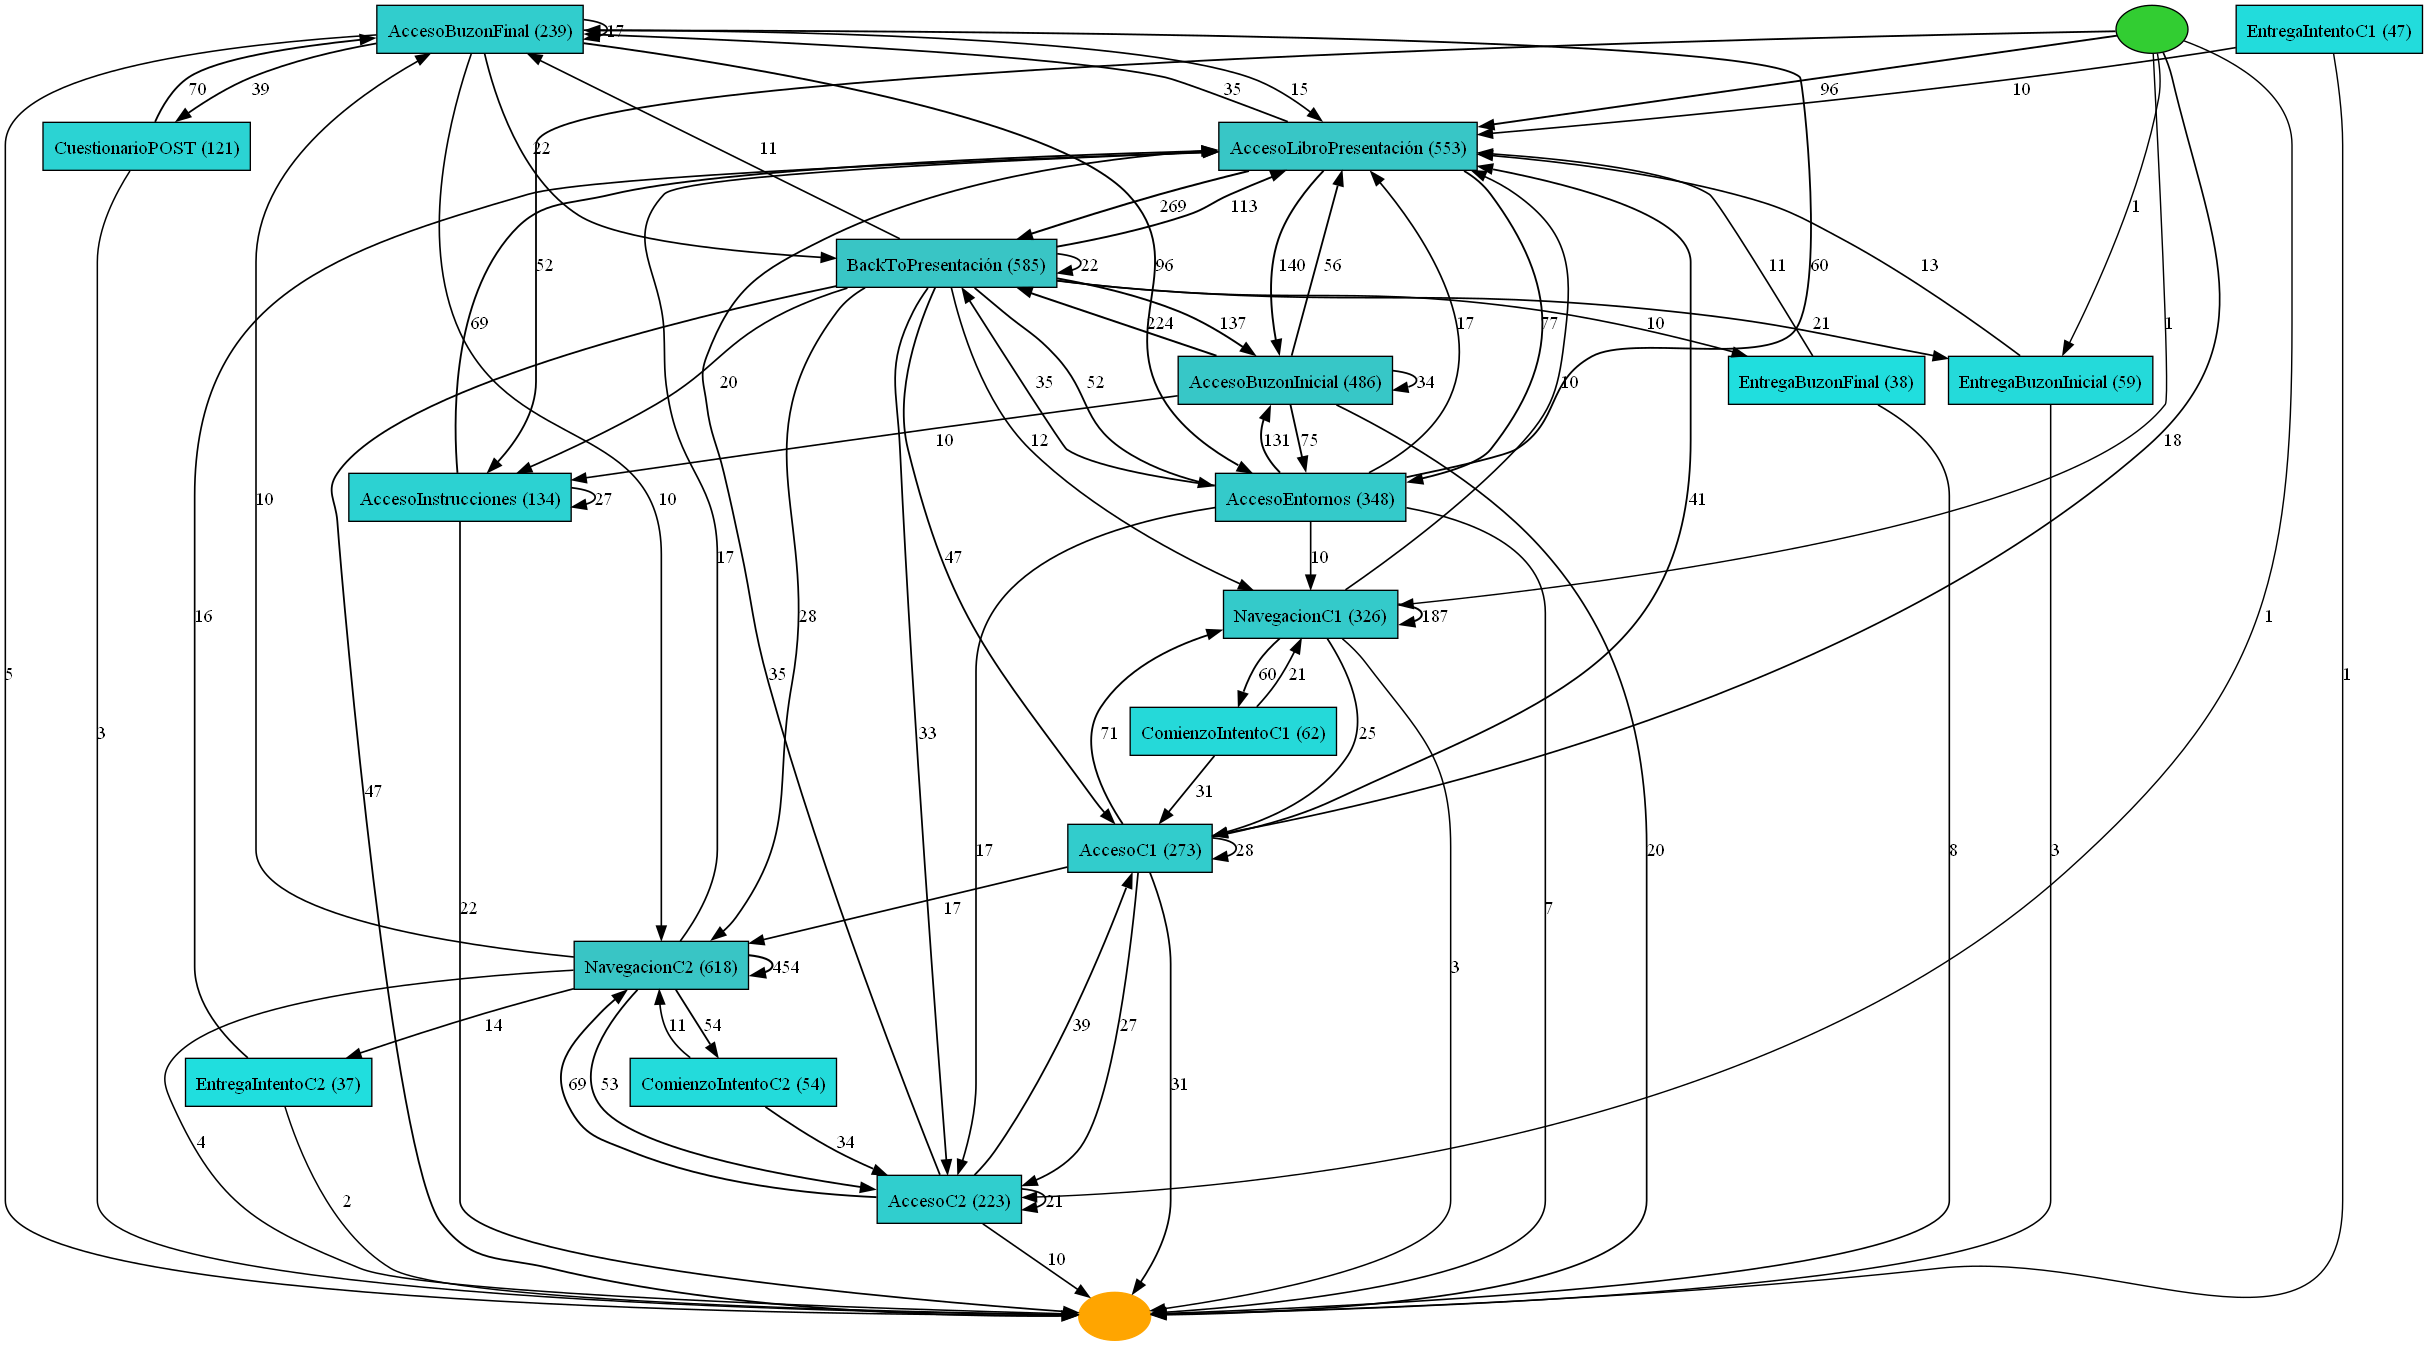

In [3]:
process_tree_f = pm4py.discover_process_tree_inductive(event_log_filtered, noise_threshold=0.2)
bpmn_model_f = pm4py.convert_to_bpmn(process_tree_f)
pm4py.view_bpmn(bpmn_model_f)
pm4py.save_vis_bpmn(bpmn_model_f, 'Graphs/1-Conjunto-A1A2.png')

map_0 = pm4py.discover_heuristics_net(event_log_filtered, dependency_threshold=0.9, loop_two_threshold=0.7)
pm4py.view_heuristics_net(map_0)
pm4py.save_vis_heuristics_net(map_0, "Graphs/4-Conjunto-A1A2.png")

In [4]:
# Proceso con solo el curso A2 presencial
event_log_2_filtered = event_log_2[~event_log_2['NombreEvento'].str.contains(r'C?R+')]
event_log_2_filtered = pm4py.format_dataframe(event_log_2_filtered, case_id='Idusuario', activity_key='NombreEvento', timestamp_key='Hora')

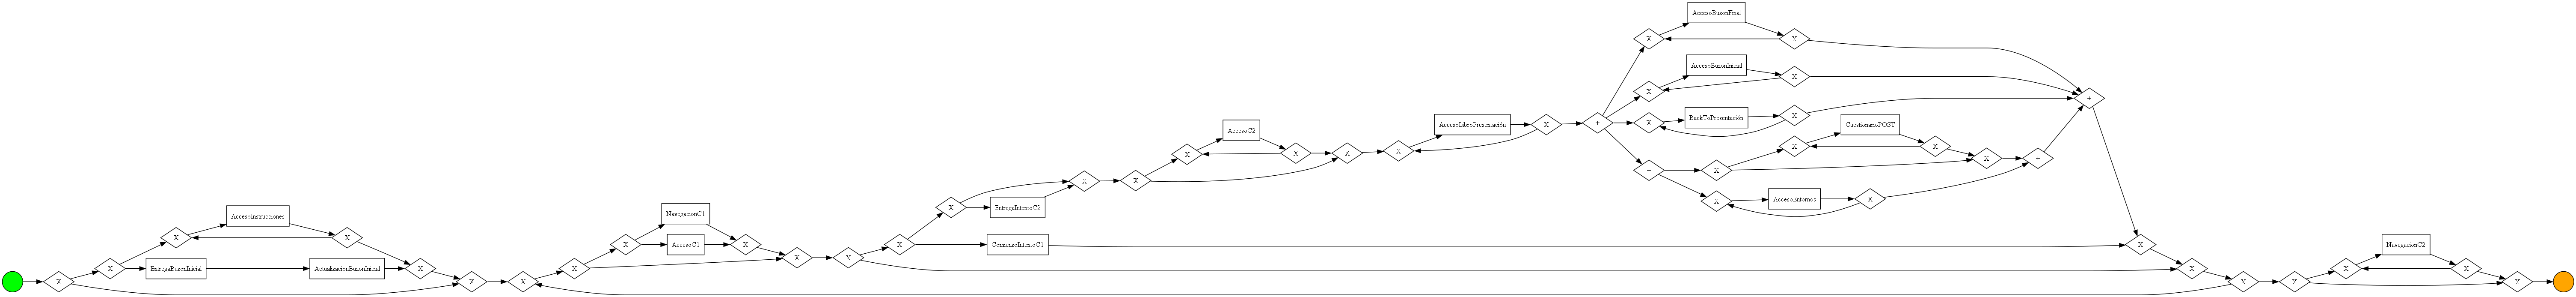

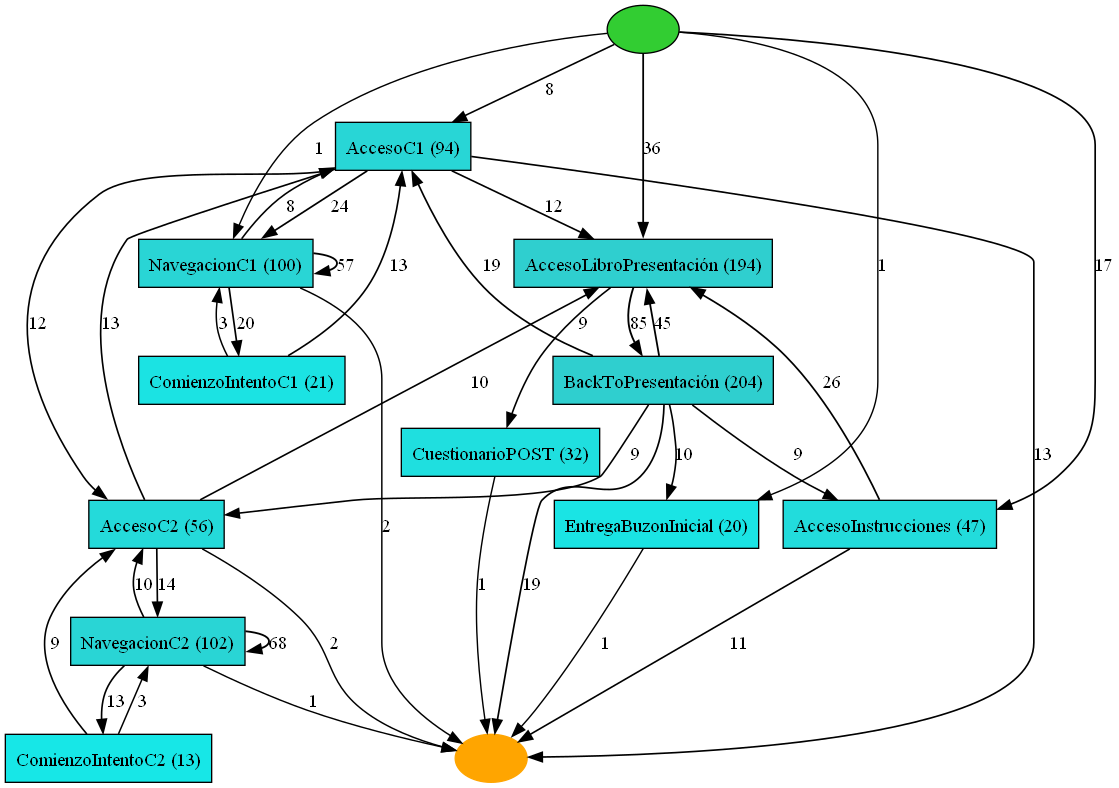

In [5]:
process_tree_f = pm4py.discover_process_tree_inductive(event_log_2_filtered, noise_threshold=0.25)
bpmn_model_f = pm4py.convert_to_bpmn(process_tree_f)
pm4py.view_bpmn(bpmn_model_f)
pm4py.save_vis_bpmn(bpmn_model_f, 'Graphs/1-Modelo-A2-solo.png')

map_0 = pm4py.discover_heuristics_net(event_log_2_filtered, dependency_threshold=0.9, loop_two_threshold=0.7)
pm4py.view_heuristics_net(map_0)
pm4py.save_vis_heuristics_net(map_0, "Graphs/4-Modelo-A2-solo.png")